# onderzoeksvragen:

 - In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
 - welke kenmerken van een film bepalen de imdb score?
 - Welke genres zijn over de loop van de jaren populairder geworden?
 - In hoeverre heeft de release date van een sequel invloed om de IMDB score van die sequel?


In [1]:
# importeren van libaries.
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import altair as alt
from scipy import stats
import seaborn as sns
from scipy.integrate import quad
import scipy
import statistics

In [2]:
# test om het bestand te lezen
df_1_not_cleaned = pd.read_csv('moviedataset.csv')
# head eerste 5 regels van het bestand
df_1_cleaned = df_1_not_cleaned.dropna(axis=0, how='any')
df_1_cleaned.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [3]:
# data cleaning dataset 1
data_1 = df_1_cleaned.drop(["color", "plot_keywords", "aspect_ratio", "movie_imdb_link", "actor_2_facebook_likes", "actor_1_facebook_likes", "actor_3_facebook_likes", "country"], axis=1)
dataset_1 = data_1.reindex(columns= ['movie_title', 'imdb_score', 'title_year', 'duration','genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', 'content_rating', 'num_user_for_reviews', 'language'])
# De Blank spaces van de data veravangen met none
dataset_1.head()

,movie_title,imdb_score,title_year,duration,genres,director_name,actor_1_name,actor_2_name,actor_3_name,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,content_rating,num_user_for_reviews,language
0,Avatar,7.9,2009.0,178.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,33000,0.0,4834,PG-13,3054.0,English
1,Pirates of the Caribbean: At World's End,7.1,2007.0,169.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,0,563.0,48350,PG-13,1238.0,English
2,Spectre,6.8,2015.0,148.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,85000,0.0,11700,PG-13,994.0,English
3,The Dark Knight Rises,8.5,2012.0,164.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,164000,22000.0,106759,PG-13,2701.0,English
5,John Carter,6.6,2012.0,132.0,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,24000,475.0,1873,PG-13,738.0,English


In [4]:
# tabel die statistische weergaven geeft van de numerieke data van dataset 1
dataset_1.describe()

,imdb_score,title_year,duration,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,6.465282,2002.976571,110.257987,9353.829340,807.336528,11527.101970,336.843184
std,1.056247,9.888108,22.646717,21462.889123,3068.171683,19122.176905,411.227368
min,1.600000,1927.000000,37.000000,0.000000,0.000000,0.000000,4.000000
25%,5.900000,1999.000000,96.000000,0.000000,11.000000,1919.750000,110.000000
50%,6.600000,2004.000000,106.000000,227.000000,64.000000,4059.500000,210.000000
75%,7.200000,2010.000000,120.000000,11000.000000,235.000000,16240.000000,398.250000
max,9.300000,2016.000000,330.000000,349000.000000,23000.000000,656730.000000,5060.000000


In [5]:
# test om het bestand te lezen
df_2_not_cleaned = pd.read_csv("MoviesWithSequels.csv", encoding= 'unicode_escape') 
# head eerste 5 regels van het bestand
df_2_cleaned = df_2_not_cleaned.dropna(axis=0, thresh=2)
df_2_cleaned.head()

,Position,Const,Created,Modified,Description,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0145487,03-11-2011,03-11-2011,NaN,Spider-Man,https://www.imdb.com/title/tt0145487/,movie,7.3,121.0,2002.0,"Action, Adventure, Sci-Fi",670777.0,30-04-2002,Sam Raimi
1,2,tt0316654,03-11-2011,03-11-2011,NaN,Spider-Man 2,https://www.imdb.com/title/tt0316654/,movie,7.3,127.0,2004.0,"Action, Adventure, Sci-Fi",528482.0,25-06-2004,Sam Raimi
2,3,tt0413300,03-11-2011,03-11-2011,NaN,Spider-Man 3,https://www.imdb.com/title/tt0413300/,movie,6.2,139.0,2007.0,"Action, Adventure, Sci-Fi",485814.0,03-04-2007,Sam Raimi
3,4,tt0133093,03-11-2011,03-11-2011,NaN,The Matrix,https://www.imdb.com/title/tt0133093/,movie,8.7,136.0,1999.0,"Action, Sci-Fi",1615984.0,24-03-1999,"Lilly Wachowski, Lana Wachowski"
4,5,tt0234215,03-11-2011,03-11-2011,NaN,The Matrix Reloaded,https://www.imdb.com/title/tt0234215/,movie,7.2,138.0,2003.0,"Action, Sci-Fi",502256.0,07-05-2003,"Lilly Wachowski, Lana Wachowski"


In [6]:
# data cleaning dataset 2
data_2 = df_2_cleaned.drop(['Const', 'Position', 'Created', 'Modified', 'Description', 'Title Type', 'URL', 'Year'], axis=1)
dataset_2 = data_2.reindex(columns= ['Title', 'IMDb Rating', 'Release Date', 'Runtime (mins)', 'Genres', 'Directors', 'Num Votes'])
dataset_2.head()

,Title,IMDb Rating,Release Date,Runtime (mins),Genres,Directors,Num Votes
0,Spider-Man,7.3,30-04-2002,121.0,"Action, Adventure, Sci-Fi",Sam Raimi,670777.0
1,Spider-Man 2,7.3,25-06-2004,127.0,"Action, Adventure, Sci-Fi",Sam Raimi,528482.0
2,Spider-Man 3,6.2,03-04-2007,139.0,"Action, Adventure, Sci-Fi",Sam Raimi,485814.0
3,The Matrix,8.7,24-03-1999,136.0,"Action, Sci-Fi","Lilly Wachowski, Lana Wachowski",1615984.0
4,The Matrix Reloaded,7.2,07-05-2003,138.0,"Action, Sci-Fi","Lilly Wachowski, Lana Wachowski",502256.0


In [7]:
# tabel die statistische weergaven geeft van de numerieke data van dataset 2
dataset_2.describe()

,IMDb Rating,Runtime (mins),Num Votes
count,1053.000000,1053.000000,1.053000e+03
mean,6.233428,105.039886,1.781977e+05
std,1.223566,19.299036,2.420719e+05
min,1.400000,21.000000,3.920000e+02
25%,5.500000,92.000000,2.680600e+04
50%,6.400000,101.000000,8.971700e+04
75%,7.100000,115.000000,2.254380e+05
max,9.200000,202.000000,2.220190e+06


In [8]:
# Find out what main genre is, then selects all movies with that main genre.
genres = dataset_1['genres'].values.tolist()
maingenres = []
for x in genres:
    if '|' in x:
        x = x.split('|')
        x = x[0]
    maingenres.append(x)


dataset_1['main_genre'] = maingenres

In [9]:
# data set voor onderzoekvraag 1
data_onderzoekvraag_1 = dataset_1.drop(['movie_title', 'title_year', 'duration', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'num_user_for_reviews', 'language'], axis=1)
data_onderzoekvraag_1.head()

,imdb_score,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,main_genre
0,7.9,33000,0.0,4834,Action
1,7.1,0,563.0,48350,Action
2,6.8,85000,0.0,11700,Action
3,8.5,164000,22000.0,106759,Action
5,6.6,24000,475.0,1873,Action


In [10]:
# data set voor onderzoekvraag 2
data_onderzoekvraag_2 = dataset_1.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_facebook_likes', 'director_facebook_likes', 'cast_total_facebook_likes', 'num_user_for_reviews'], axis=1)
data_onderzoekvraag_2.head()

,movie_title,imdb_score,title_year,duration,genres,content_rating,language,main_genre
0,Avatar,7.9,2009.0,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,English,Action
1,Pirates of the Caribbean: At World's End,7.1,2007.0,169.0,Action|Adventure|Fantasy,PG-13,English,Action
2,Spectre,6.8,2015.0,148.0,Action|Adventure|Thriller,PG-13,English,Action
3,The Dark Knight Rises,8.5,2012.0,164.0,Action|Thriller,PG-13,English,Action
5,John Carter,6.6,2012.0,132.0,Action|Adventure|Sci-Fi,PG-13,English,Action


In [11]:
# data set voor onderzoekvraag 3
data_onderzoekvraag_3_x = dataset_1.drop(['movie_title', 'duration', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'content_rating', 'language', 'genres'], axis=1)
data_onderzoekvraag_3 = data_onderzoekvraag_3_x[:5000]
data_onderzoekvraag_3.head()

,imdb_score,title_year,movie_facebook_likes,director_facebook_likes,cast_total_facebook_likes,num_user_for_reviews,main_genre
0,7.9,2009.0,33000,0.0,4834,3054.0,Action
1,7.1,2007.0,0,563.0,48350,1238.0,Action
2,6.8,2015.0,85000,0.0,11700,994.0,Action
3,8.5,2012.0,164000,22000.0,106759,2701.0,Action
5,6.6,2012.0,24000,475.0,1873,738.0,Action


In [12]:
# data set voor onderzoekvraag 4
data_onderzoekvraag_4 = dataset_2.drop(['Runtime (mins)', 'Genres', 'Directors', 'Num Votes'], axis=1)
data_onderzoekvraag_4.head()

,Title,IMDb Rating,Release Date
0,Spider-Man,7.3,30-04-2002
1,Spider-Man 2,7.3,25-06-2004
2,Spider-Man 3,6.2,03-04-2007
3,The Matrix,8.7,24-03-1999
4,The Matrix Reloaded,7.2,07-05-2003


### 'Standaard' vraag uitwerkingen.

De stelling: 'Een filmcriticus stelt dat de score van Engelstalige films lager is dan gemiddeld.'



In [13]:
Engelse_taal = data_onderzoekvraag_2.loc[(data_onderzoekvraag_2['language'] == "English")]
Steekproef_Engelstalige = Engelse_taal.sample(n=100, random_state = 1)
Steekproef_Engelstalige_scores = Steekproef_Engelstalige['imdb_score']
Steekproef_Engelstalige_scores_list = Steekproef_Engelstalige_scores.values.tolist()
Engelse_taal_avg_score = np.mean(Steekproef_Engelstalige['imdb_score'])

Andere_talen = data_onderzoekvraag_2.loc[(data_onderzoekvraag_2['language'] != "English")]
Populatie_Andere_Talen = Andere_talen['imdb_score']
Populatie_Andere_Talen_list = Populatie_Andere_Talen.values.tolist()
Andere_talen_Avg_score = np.mean(Andere_talen['imdb_score'])

Alle_talen = Steekproef_Engelstalige_scores_list + Populatie_Andere_Talen_list
Alle_talen_avg_score = np.mean(Alle_talen)

datasheet_scores = pd.DataFrame([(Alle_talen_avg_score, "Alle talen"), (Andere_talen_Avg_score, "Non_English"), (Engelse_taal_avg_score, "English")], columns =['Average IMDB score', 'Language']) 
datasheet_scores.head()

,Average IMDB score,Language
0,6.947674,Alle talen
1,7.336076,Non_English
2,6.334000,English


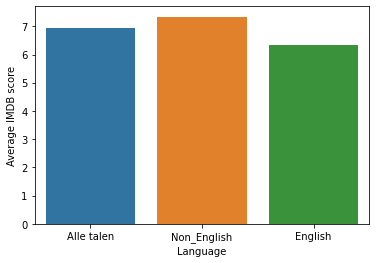

In [14]:
sns.barplot(x='Language', y='Average IMDB score', data=datasheet_scores)

In [15]:
z_scores_alle_Talen = stats.zscore(Alle_talen)

z_score_engels = (Steekproef_Engelstalige_scores-Alle_talen_avg_score)/ statistics.stdev(Alle_talen)
avg_z_score_engels = np.mean(z_score_engels)
avg_p_value_engels = scipy.stats.norm.sf(abs(avg_z_score_engels))

z_score_andere_talen = (Populatie_Andere_Talen-Alle_talen_avg_score)/ statistics.stdev(Alle_talen)
avg_z_score_andere_talen = np.mean(z_score_andere_talen)
avg_p_value_andere_talen = scipy.stats.norm.sf(abs(avg_z_score_andere_talen))

print("De gemiddelde p value van de engelse films is {}".format(avg_p_value_engels))
print("De gemiddelde p value van de niet engelse films is {}".format(avg_p_value_andere_talen))

De gemiddelde p value van de engelse films is 0.27092240944678764
De gemiddelde p value van de niet engelse films is 0.34971420015119714


### Onderzoeksvraag 1 conclusie en uitwerkingen.

### Onderzoeksvraag 2 conclusie en uitwerkingen.

### Onderzoeksvraag 3 conclusie en uitwerkingen.
Conclusie: zo goed als alle genres zijn beter gaan lopen, dat heeft ermee te maken dat de film industrie een stuk groter is geworden vergeleken met vorige eeuw. Een paar uitzonderingen zijn: Western, musical en thriller (op basis van de dataset). Die zijn volgens de cijfers eigenlijk niet meer uitgebracht. 


In [16]:
# Maakt een lijst aan met alle genres één keer daarin. 17 in totaal
all_genres_duplicates = data_onderzoekvraag_3['main_genre'].values.tolist()
all_genres_once = []
for i in all_genres_duplicates: 
    if i not in all_genres_once: 
        all_genres_once.append(i) 
        
all_genres_once.sort()   
Genres_Dataset = pd.DataFrame(all_genres_once, columns =['Genre']) # Maakt een dataset met de vergaarde informatie
#print(all_genres_once)

In [17]:
# Maakt een gesorteerde lijst aan met alle jaren uit de dataset één keer daarin. 
# 1959-2016. Van 1927 tot 1959 missen er een paar.
all_years_duplicates = data_onderzoekvraag_3['title_year'].values.tolist()
all_years_once = []
for i in all_years_duplicates: 
    if i not in all_years_once:
        all_years_once.append(i) 
        
all_years_once = [round(x) for x in all_years_once]
all_years_once.sort()
Years_Dataset = pd.DataFrame(all_years_once, columns =['Year']) # Maakt een dataset met de vergaarde informatie
#print(all_years_once)

In [18]:
# Een for loop die die voor elk genre en jaar de gemiddelde imdb score uitrekent. 17*74 = 1258 gemiddelden
uitslag = [] 
for i in range(len(all_genres_once)): 
    genre = all_genres_once[i]
    for i in range(len(all_years_once)):
        year = all_years_once[i]
        for i in range(len(all_years_once)):
                    x = data_onderzoekvraag_3.loc[(data_onderzoekvraag_3['main_genre'] == genre) & (data_onderzoekvraag_3['title_year'] == year)] # selecteert de data die voldoet aan de eisen voor de loop. Bijv.: alle films uit het genre Action en uit het jaar 1982 of alle films uit het genre Western en uit het jaar 1985 
                    avg = []
                    for i in range(len(x['imdb_score'])): # als er geen film is uitgebracht in een bepaald jaar en genre word de uitkomst automatisch 0.
                        avg.append(i)  
                    if len(avg) > 0:
                        average = np.mean(x['imdb_score']) # berekent het gemiddelde als er een film is uitgebracht in dat jaar en genre.
                    else:
                        average = 0 # als er geen film is uitgebracht in een bepaald jaar en genre word de uitkomst automatisch 0. Anders krijg je 'divide by zero' error.
        print('Het gemiddelde van het jaar {} voor het genre {} is: {}'.format(year, genre, average))
        out = (year, genre, average)
        uitslag.append(out) # stopt alle uitkomsten in de lijst 'uitslag'. (year, genre, average).

#print(uitslag)

Het gemiddelde van het jaar 1927 voor het genre Action is: 0
Het gemiddelde van het jaar 1929 voor het genre Action is: 0
Het gemiddelde van het jaar 1933 voor het genre Action is: 0
Het gemiddelde van het jaar 1935 voor het genre Action is: 0
Het gemiddelde van het jaar 1936 voor het genre Action is: 0
Het gemiddelde van het jaar 1937 voor het genre Action is: 0
Het gemiddelde van het jaar 1939 voor het genre Action is: 0
Het gemiddelde van het jaar 1940 voor het genre Action is: 0
Het gemiddelde van het jaar 1946 voor het genre Action is: 0
Het gemiddelde van het jaar 1947 voor het genre Action is: 0
Het gemiddelde van het jaar 1948 voor het genre Action is: 0
Het gemiddelde van het jaar 1950 voor het genre Action is: 0
Het gemiddelde van het jaar 1952 voor het genre Action is: 0
Het gemiddelde van het jaar 1953 voor het genre Action is: 0
Het gemiddelde van het jaar 1954 voor het genre Action is: 8.7
Het gemiddelde van het jaar 1957 voor het genre Action is: 0
Het gemiddelde van het

Het gemiddelde van het jaar 1992 voor het genre Adventure is: 6.866666666666667
Het gemiddelde van het jaar 1993 voor het genre Adventure is: 6.416666666666668
Het gemiddelde van het jaar 1994 voor het genre Adventure is: 7.0
Het gemiddelde van het jaar 1995 voor het genre Adventure is: 7.140000000000001
Het gemiddelde van het jaar 1996 voor het genre Adventure is: 6.214285714285714
Het gemiddelde van het jaar 1997 voor het genre Adventure is: 7.12
Het gemiddelde van het jaar 1998 voor het genre Adventure is: 6.3
Het gemiddelde van het jaar 1999 voor het genre Adventure is: 6.75
Het gemiddelde van het jaar 2000 voor het genre Adventure is: 6.0058823529411764
Het gemiddelde van het jaar 2001 voor het genre Adventure is: 6.6923076923076925
Het gemiddelde van het jaar 2002 voor het genre Adventure is: 6.25
Het gemiddelde van het jaar 2003 voor het genre Adventure is: 6.038461538461538
Het gemiddelde van het jaar 2004 voor het genre Adventure is: 6.885714285714285
Het gemiddelde van het ja

Het gemiddelde van het jaar 1965 voor het genre Biography is: 7.3
Het gemiddelde van het jaar 1966 voor het genre Biography is: 0
Het gemiddelde van het jaar 1967 voor het genre Biography is: 0
Het gemiddelde van het jaar 1968 voor het genre Biography is: 0
Het gemiddelde van het jaar 1969 voor het genre Biography is: 8.1
Het gemiddelde van het jaar 1970 voor het genre Biography is: 0
Het gemiddelde van het jaar 1971 voor het genre Biography is: 0
Het gemiddelde van het jaar 1972 voor het genre Biography is: 0
Het gemiddelde van het jaar 1973 voor het genre Biography is: 0
Het gemiddelde van het jaar 1974 voor het genre Biography is: 0
Het gemiddelde van het jaar 1975 voor het genre Biography is: 0
Het gemiddelde van het jaar 1976 voor het genre Biography is: 0
Het gemiddelde van het jaar 1977 voor het genre Biography is: 0
Het gemiddelde van het jaar 1978 voor het genre Biography is: 0
Het gemiddelde van het jaar 1979 voor het genre Biography is: 7.6
Het gemiddelde van het jaar 1980 v

Het gemiddelde van het jaar 2010 voor het genre Comedy is: 5.995833333333334
Het gemiddelde van het jaar 2011 voor het genre Comedy is: 6.230769230769231
Het gemiddelde van het jaar 2012 voor het genre Comedy is: 6.1605263157894745
Het gemiddelde van het jaar 2013 voor het genre Comedy is: 6.133333333333334
Het gemiddelde van het jaar 2014 voor het genre Comedy is: 6.148148148148148
Het gemiddelde van het jaar 2015 voor het genre Comedy is: 6.25
Het gemiddelde van het jaar 2016 voor het genre Comedy is: 5.814285714285715
Het gemiddelde van het jaar 1927 voor het genre Crime is: 0
Het gemiddelde van het jaar 1929 voor het genre Crime is: 0
Het gemiddelde van het jaar 1933 voor het genre Crime is: 0
Het gemiddelde van het jaar 1935 voor het genre Crime is: 0
Het gemiddelde van het jaar 1936 voor het genre Crime is: 0
Het gemiddelde van het jaar 1937 voor het genre Crime is: 0
Het gemiddelde van het jaar 1939 voor het genre Crime is: 0
Het gemiddelde van het jaar 1940 voor het genre Crime

Het gemiddelde van het jaar 1988 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1989 voor het genre Documentary is: 7.5
Het gemiddelde van het jaar 1990 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1991 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1992 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1993 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1994 voor het genre Documentary is: 8.3
Het gemiddelde van het jaar 1995 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1996 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1997 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1998 voor het genre Documentary is: 0
Het gemiddelde van het jaar 1999 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2000 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2001 voor het genre Documentary is: 0
Het gemiddelde van het jaar 2002 voor het genre Documentary is: 0
Het ge

Het gemiddelde van het jaar 1965 voor het genre Family is: 0
Het gemiddelde van het jaar 1966 voor het genre Family is: 0
Het gemiddelde van het jaar 1967 voor het genre Family is: 0
Het gemiddelde van het jaar 1968 voor het genre Family is: 0
Het gemiddelde van het jaar 1969 voor het genre Family is: 0
Het gemiddelde van het jaar 1970 voor het genre Family is: 0
Het gemiddelde van het jaar 1971 voor het genre Family is: 0
Het gemiddelde van het jaar 1972 voor het genre Family is: 0
Het gemiddelde van het jaar 1973 voor het genre Family is: 0
Het gemiddelde van het jaar 1974 voor het genre Family is: 0
Het gemiddelde van het jaar 1975 voor het genre Family is: 0
Het gemiddelde van het jaar 1976 voor het genre Family is: 0
Het gemiddelde van het jaar 1977 voor het genre Family is: 0
Het gemiddelde van het jaar 1978 voor het genre Family is: 0
Het gemiddelde van het jaar 1979 voor het genre Family is: 0
Het gemiddelde van het jaar 1980 voor het genre Family is: 0
Het gemiddelde van het j

Het gemiddelde van het jaar 1940 voor het genre Horror is: 0
Het gemiddelde van het jaar 1946 voor het genre Horror is: 0
Het gemiddelde van het jaar 1947 voor het genre Horror is: 0
Het gemiddelde van het jaar 1948 voor het genre Horror is: 0
Het gemiddelde van het jaar 1950 voor het genre Horror is: 0
Het gemiddelde van het jaar 1952 voor het genre Horror is: 0
Het gemiddelde van het jaar 1953 voor het genre Horror is: 0
Het gemiddelde van het jaar 1954 voor het genre Horror is: 0
Het gemiddelde van het jaar 1957 voor het genre Horror is: 0
Het gemiddelde van het jaar 1959 voor het genre Horror is: 0
Het gemiddelde van het jaar 1960 voor het genre Horror is: 8.5
Het gemiddelde van het jaar 1961 voor het genre Horror is: 0
Het gemiddelde van het jaar 1962 voor het genre Horror is: 0
Het gemiddelde van het jaar 1963 voor het genre Horror is: 0
Het gemiddelde van het jaar 1964 voor het genre Horror is: 0
Het gemiddelde van het jaar 1965 voor het genre Horror is: 0
Het gemiddelde van het

Het gemiddelde van het jaar 2004 voor het genre Musical is: 0
Het gemiddelde van het jaar 2005 voor het genre Musical is: 0
Het gemiddelde van het jaar 2006 voor het genre Musical is: 0
Het gemiddelde van het jaar 2007 voor het genre Musical is: 0
Het gemiddelde van het jaar 2008 voor het genre Musical is: 0
Het gemiddelde van het jaar 2009 voor het genre Musical is: 0
Het gemiddelde van het jaar 2010 voor het genre Musical is: 0
Het gemiddelde van het jaar 2011 voor het genre Musical is: 0
Het gemiddelde van het jaar 2012 voor het genre Musical is: 0
Het gemiddelde van het jaar 2013 voor het genre Musical is: 0
Het gemiddelde van het jaar 2014 voor het genre Musical is: 0
Het gemiddelde van het jaar 2015 voor het genre Musical is: 0
Het gemiddelde van het jaar 2016 voor het genre Musical is: 0
Het gemiddelde van het jaar 1927 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1929 voor het genre Mystery is: 0
Het gemiddelde van het jaar 1933 voor het genre Mystery is: 0
Het gemi

Het gemiddelde van het jaar 1988 voor het genre Romance is: 0
Het gemiddelde van het jaar 1989 voor het genre Romance is: 0
Het gemiddelde van het jaar 1990 voor het genre Romance is: 0
Het gemiddelde van het jaar 1991 voor het genre Romance is: 0
Het gemiddelde van het jaar 1992 voor het genre Romance is: 0
Het gemiddelde van het jaar 1993 voor het genre Romance is: 0
Het gemiddelde van het jaar 1994 voor het genre Romance is: 0
Het gemiddelde van het jaar 1995 voor het genre Romance is: 0
Het gemiddelde van het jaar 1996 voor het genre Romance is: 0
Het gemiddelde van het jaar 1997 voor het genre Romance is: 0
Het gemiddelde van het jaar 1998 voor het genre Romance is: 0
Het gemiddelde van het jaar 1999 voor het genre Romance is: 0
Het gemiddelde van het jaar 2000 voor het genre Romance is: 0
Het gemiddelde van het jaar 2001 voor het genre Romance is: 0
Het gemiddelde van het jaar 2002 voor het genre Romance is: 0
Het gemiddelde van het jaar 2003 voor het genre Romance is: 0
Het gemi

Het gemiddelde van het jaar 1974 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1975 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1976 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1977 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1978 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1979 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1980 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1981 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1982 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1983 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1984 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1985 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1986 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1987 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1988 voor het genre Thriller is: 0
Het gemiddelde van het jaar 1989 voor het genre Thrille

In [19]:
Uitslag_Dataset = pd.DataFrame(uitslag, columns =['Year', 'Genre', 'Average']) # Maakt een dataset met de vergaarde informatie

In [20]:
# een interactieve visualisatie waar per jaar gekeken kan werden wat de gemiddelde score is van de genres (als dat genre is uitgebracht in dat jaar).
select_year = alt.selection_single(
    name='Select', fields=['Year'], init={'Year': 2016},
    bind=alt.binding_range(min=1927, max=2016, step=1)) # dit zorgt ervoor dat er per jaar gekeken kan worden.

# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)
alt.Chart(Uitslag_Dataset).mark_point(filled=True).encode(
    alt.X('Average'),
    alt.Y('Year'),
    alt.Color('Genre'),
    alt.OpacityValue(1),
    tooltip = [
               alt.Tooltip('Genre'),
               alt.Tooltip('Year'),
               alt.Tooltip('Average')
              ]
).add_selection(select_year).transform_filter(select_year).interactive() 

alt.Chart(...)

In [21]:
# een interactieve visualisatie waar je het totaal plaatje kan zien, alle jaren in een tabel gezet. 

alt.Chart(Uitslag_Dataset).mark_point(filled=True).encode(
    alt.X('Average'),
    alt.Y('Year'),
    alt.Color('Genre'),
    alt.OpacityValue(1),
    tooltip = [
               alt.Tooltip('Genre'),
               alt.Tooltip('Year'),
               alt.Tooltip('Average')
              ]
).interactive()
# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)

alt.Chart(...)

In [22]:
brush = alt.selection_interval() # zorgt ervoor dat je een gebied kan selecteren.
# altair.Chart(data=Undefined, encoding=Undefined, mark=Undefined, width=Undefined, height=Undefined, **kwargs)

points = alt.Chart(Uitslag_Dataset).mark_point().encode(x='Year', y='Average', 
                                                        color=alt.condition(brush, 'Genre', alt.value('lightgray'))
                                                       ).add_selection(brush)
bars = alt.Chart(Uitslag_Dataset).mark_bar().encode(y='Average', color='Genre', x='Year').transform_filter(brush)

points & bars

alt.VConcatChart(...)

In [23]:
alt.Chart(Uitslag_Dataset).mark_line().encode(
    x='Year',
    y='Average',
    color='Genre',
    tooltip = [alt.Tooltip('Genre'), alt.Tooltip('Year'), alt.Tooltip('Average')]
).interactive()

alt.Chart(...)

### Onderzoeksvraag 4 conclusie en uitwerkingen.

In [24]:
data_onderzoekvraag_4

,Title,IMDb Rating,Release Date
0,Spider-Man,7.3,30-04-2002
1,Spider-Man 2,7.3,25-06-2004
2,Spider-Man 3,6.2,03-04-2007
3,The Matrix,8.7,24-03-1999
4,The Matrix Reloaded,7.2,07-05-2003
...,...,...,...
1069,Zombieland: Double Tap,6.7,09-10-2019
1070,The Shining,8.4,23-05-1980
1071,Doctor Sleep,7.4,30-10-2019
1072,Dogville,8.0,19-05-2003
